In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import os

## Version 1 - Raw

In [4]:
!git checkout v1-raw
!dvc checkout

print("\nCheckout complete. 'data/athletes.csv' is now the v1 raw version.")
# Verify the file exists
!ls -lh data/athletes.csv

M	.dvc/config
M	data-cleansing.py
Note: switching to 'v1-raw'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at a13fc6d v1: Add raw athletes dataset
Building workspace index                              |2.00 [00:00,  109entry/s]
Comparing indexes                                    |3.00 [00:00, 1.53kentry/s]
Applying changes                                      |1.00 [00:00,   643file/s]
M       data/athletes.csv

Checkout complete. 'data/athletes.csv' is now the v1 raw version.
-rw-r--r--@ 1 luwenkai  staff   

In [6]:
df_v1 = pd.read_csv('data/athletes.csv')
print("Loaded data version with shape:", df_v1.shape)

lift_cols = ['deadlift', 'candj', 'snatch']
df_v1['total_lift'] = df_v1[lift_cols].sum(axis=1)


features = ['age', 'weight', 'height', 'backsq', 'deadlift', 'candj', 'snatch']
predictors = ['age', 'weight', 'height', 'backsq']
X = df_v1[predictors]
y = df_v1['total_lift']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Loaded data version with shape: (423006, 27)
Training set size: (338404, 4)
Test set size: (84602, 4)


--- EDA for v1 Data ---


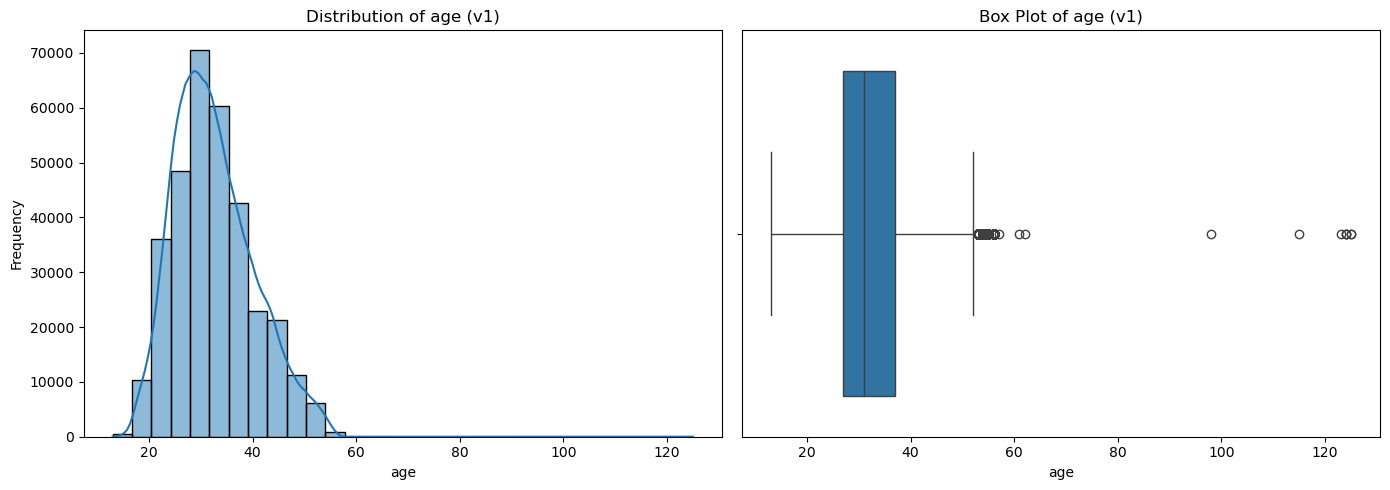

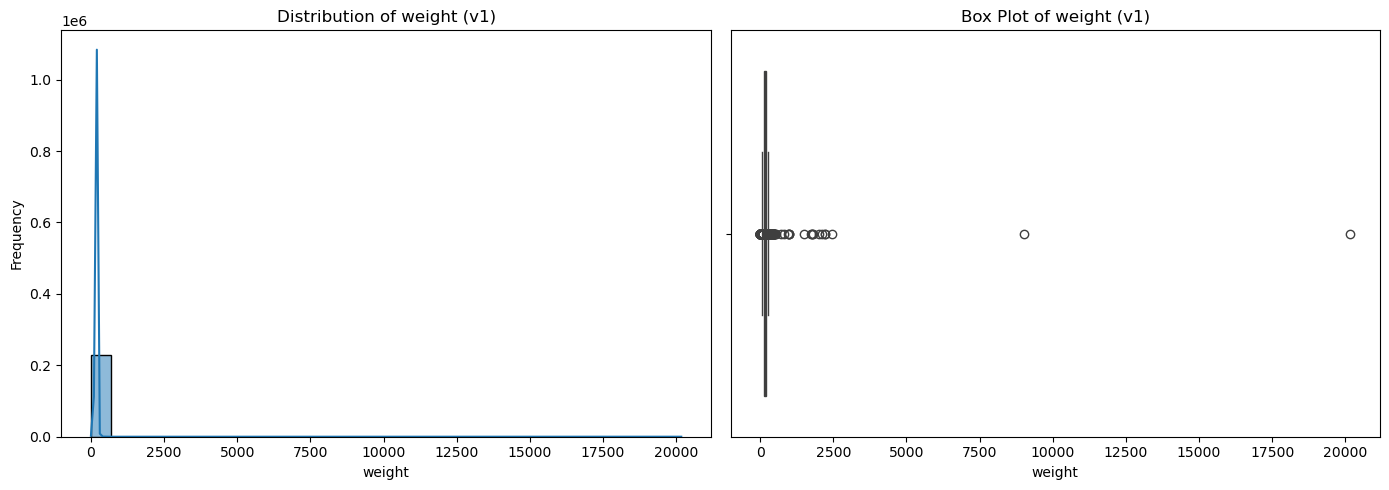

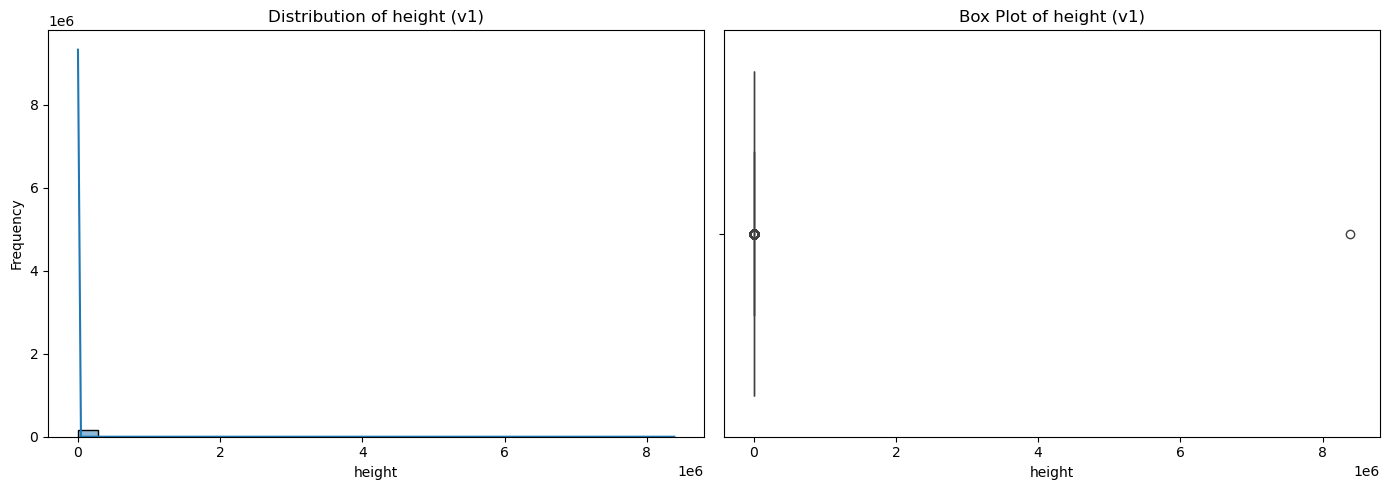

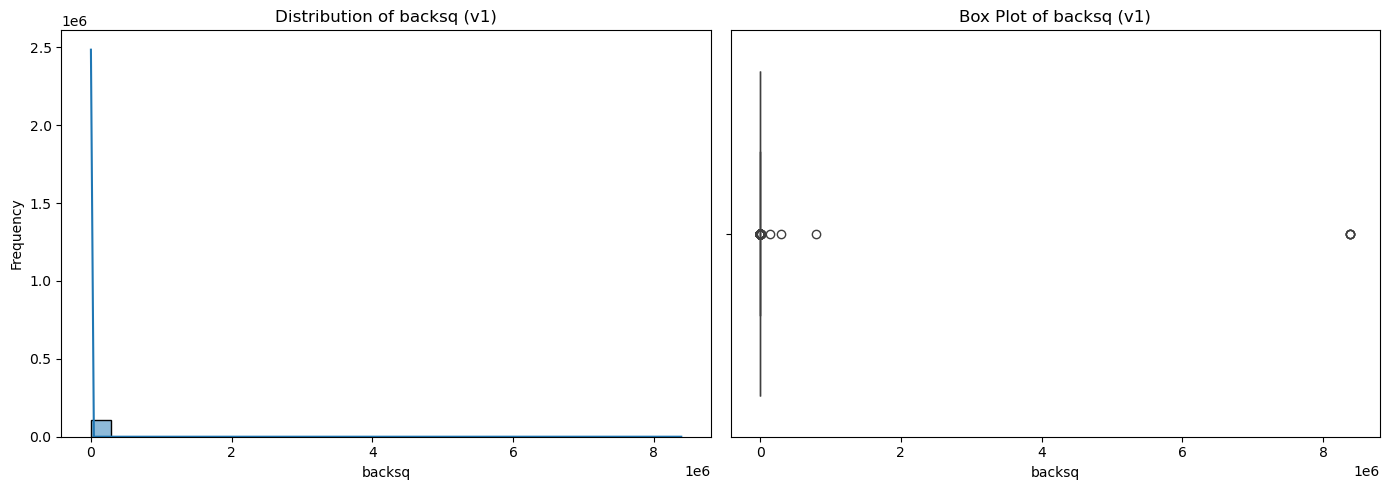

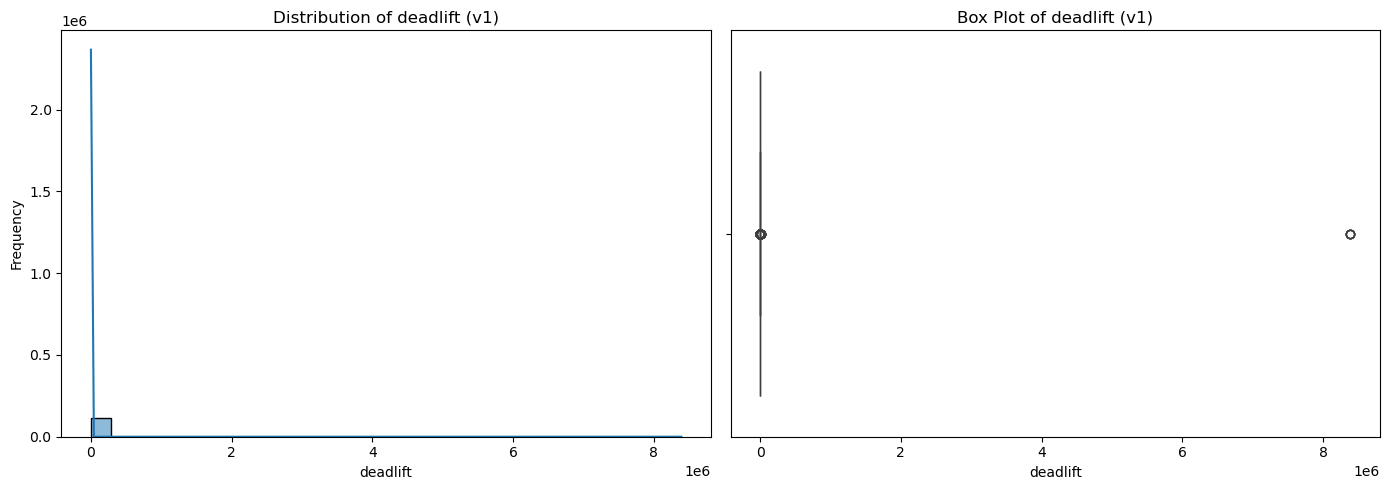

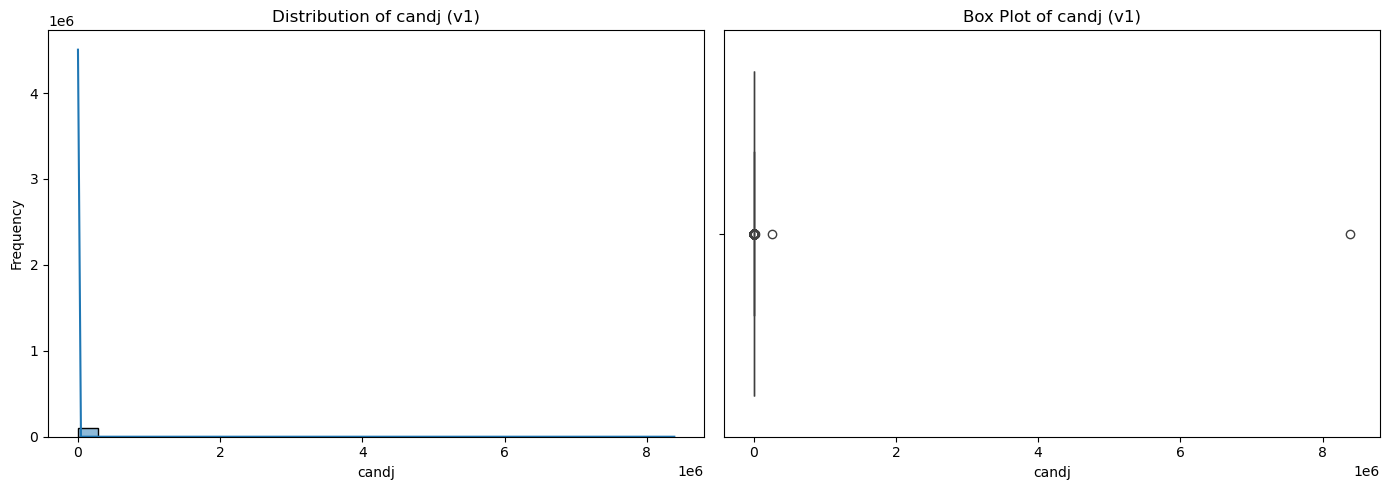

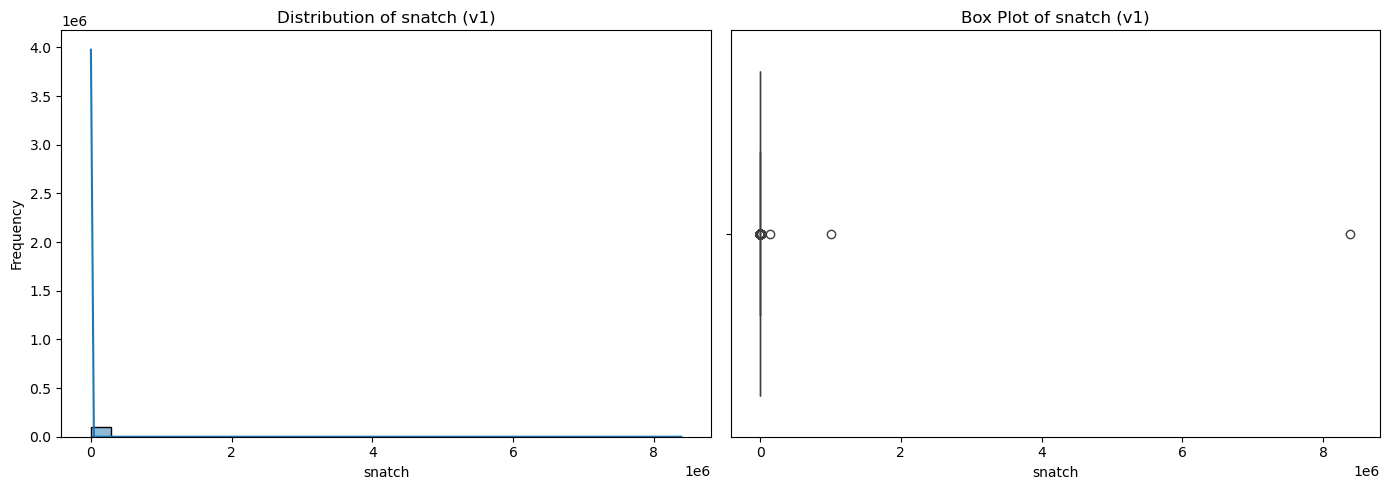

In [10]:
# EDA of v1 data

print("--- EDA for v1 Data ---")

features_to_analyze = ['age', 'weight', 'height', 'backsq', 'deadlift', 'candj', 'snatch']

for feature in features_to_analyze:
    plt.figure(figsize=(14, 5))

    # Subplot 1: Histogram with Kernel Density Estimate (KDE)
    plt.subplot(1, 2, 1)
    sns.histplot(df_v1[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} (v1)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Subplot 2: Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_v1[feature])
    plt.title(f'Box Plot of {feature} (v1)')
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()


In [12]:
# baseline model for v1 data

print("\n--- Training on v1 Data ---")

model_v1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_v1.fit(X_train, y_train)

predictions_v1 = model_v1.predict(X_test)
mae_v1 = mean_absolute_error(y_test, predictions_v1)
r2_v1 = r2_score(y_test, predictions_v1)

print(f"Metrics for v1 Model:")
print(f"Mean Absolute Error (MAE): {mae_v1:.2f}")
print(f"R-squared (R2): {r2_v1:.2f}")


--- Training on v1 Data ---
Metrics for v1 Model:
Mean Absolute Error (MAE): 379.15
R-squared (R2): 0.51


## Version 2 - Cleaned

In [15]:
!git checkout v2-clean
!dvc checkout

print("\nCheckout complete. 'data/athletes.csv' is now the v2 cleaned version.")
# Verify the file exists
!ls -lh data/athletes.csv

M	.dvc/config
M	MLOPS-HW1-DVC.ipynb
M	data-cleansing.py
Previous HEAD position was a13fc6d v1: Add raw athletes dataset
HEAD is now at 6fed1b4 v2: Add cleaned athletes dataset
Building workspace index                              |2.00 [00:00,  124entry/s]
Comparing indexes                                    |3.00 [00:00, 1.51kentry/s]
Applying changes                                      |1.00 [00:00,   425file/s]
M       data/athletes.csv

Checkout complete. 'data/athletes.csv' is now the v2 cleaned version.
-rw-r--r--@ 1 luwenkai  staff    10M Jul  1 21:54 data/athletes.csv


In [19]:
df_v2 = pd.read_csv('data/athletes.csv')
print("Loaded data version with shape:", df_v2.shape)

lift_cols = ['deadlift', 'candj', 'snatch']
df_v2['total_lift'] = df_v2[lift_cols].sum(axis=1)


features = ['age', 'weight', 'height', 'backsq', 'deadlift', 'candj', 'snatch']
predictors = ['age', 'weight', 'height', 'backsq']
X = df_v2[predictors]
y = df_v2['total_lift']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Loaded data version with shape: (30029, 14)
Training set size: (24023, 4)
Test set size: (6006, 4)


--- EDA for v2 Data ---


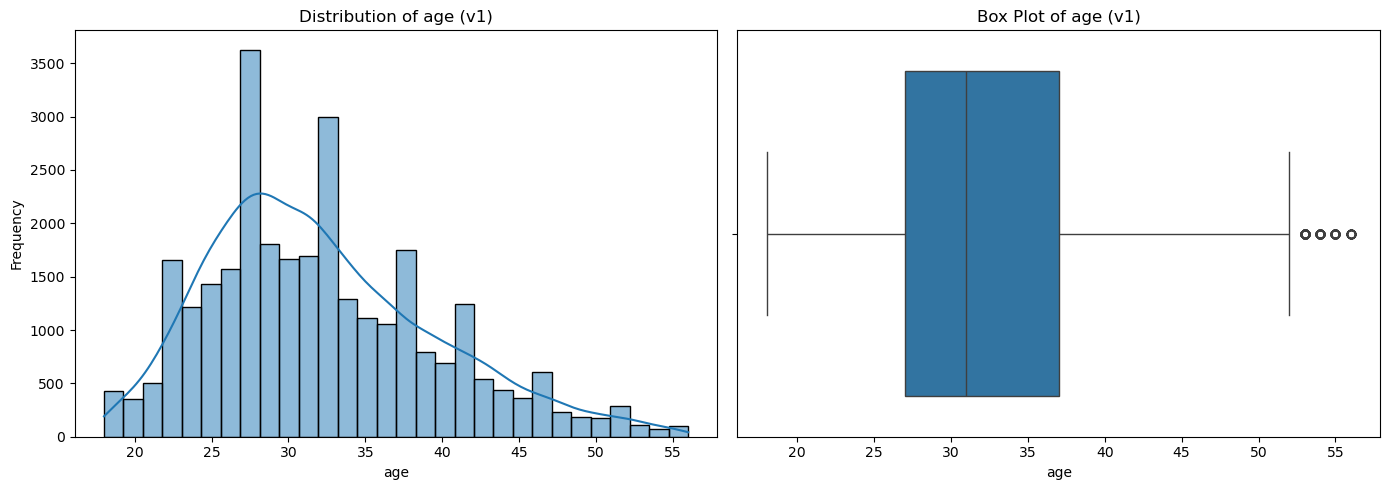

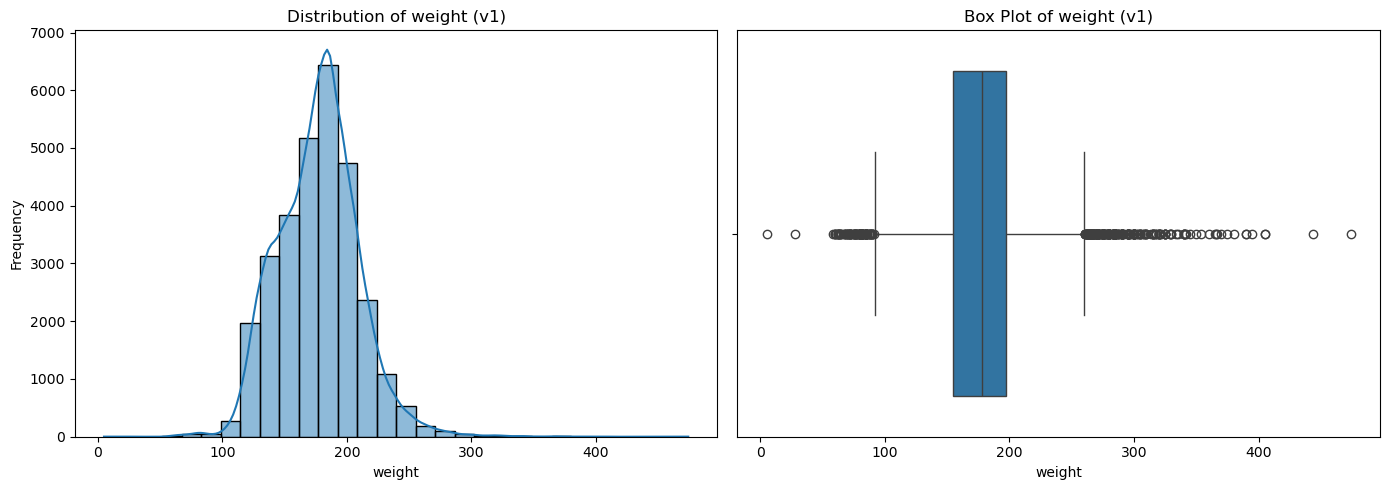

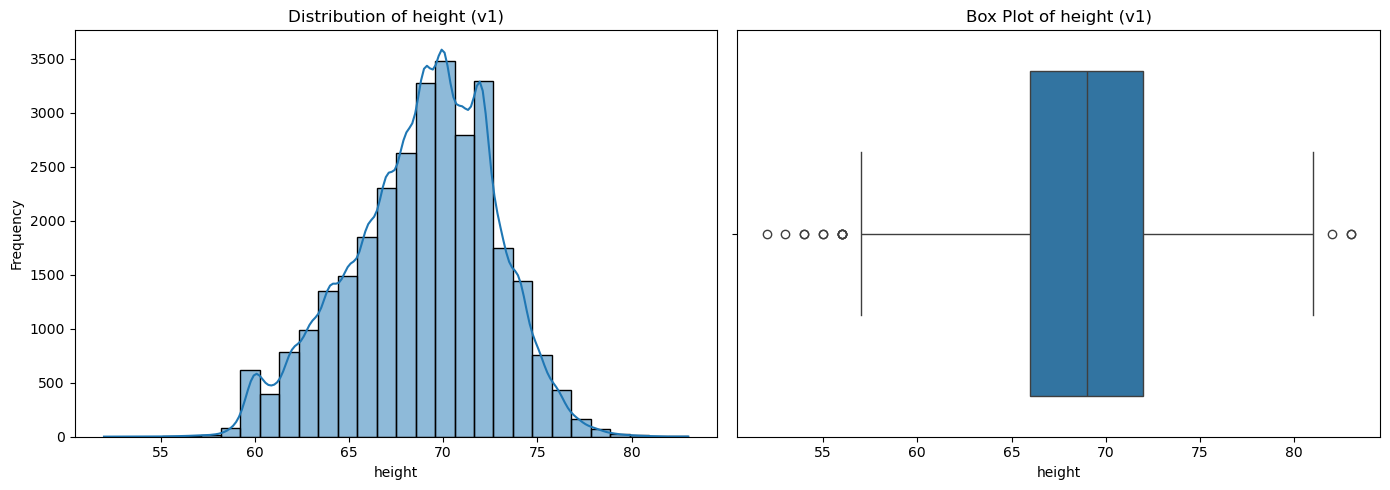

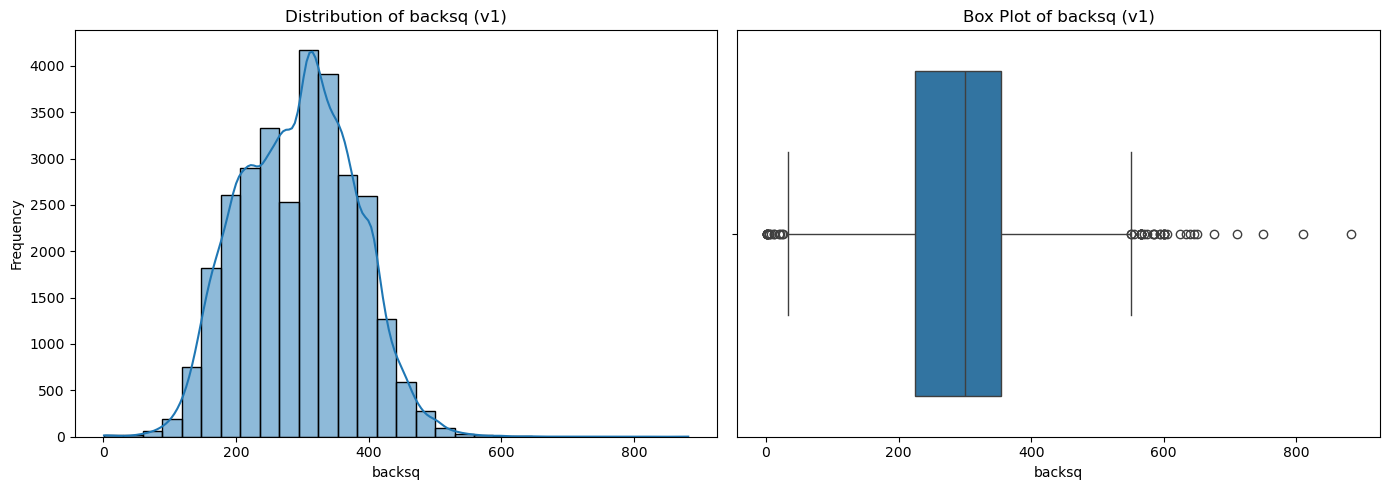

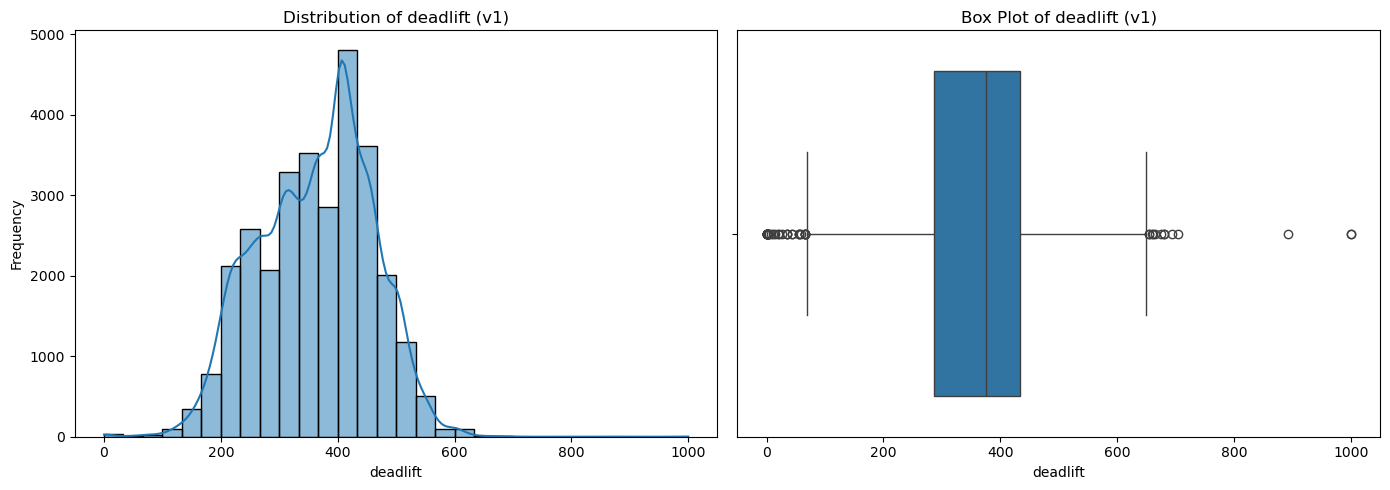

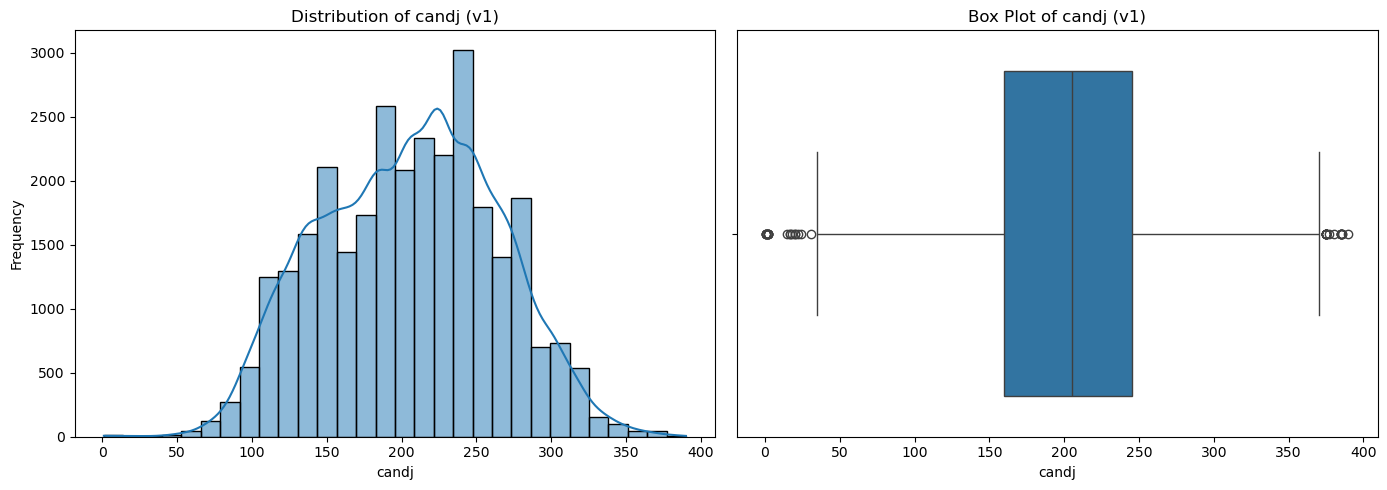

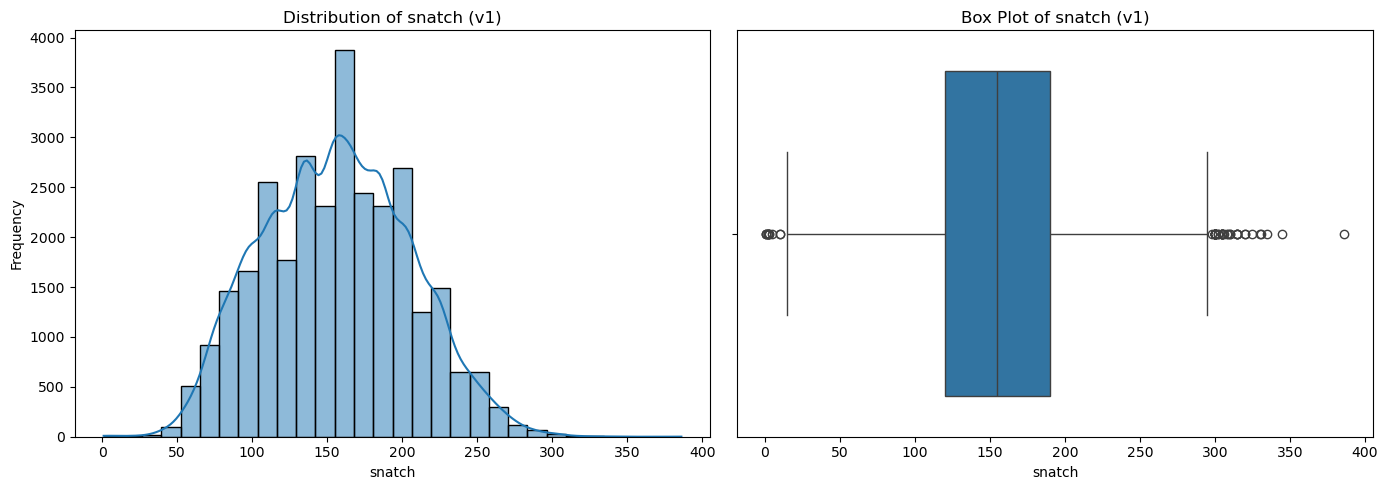

In [21]:
# EDA of v2 data

print("--- EDA for v2 Data ---")

features_to_analyze = ['age', 'weight', 'height', 'backsq', 'deadlift', 'candj', 'snatch']

for feature in features_to_analyze:
    plt.figure(figsize=(14, 5))

    # Subplot 1: Histogram with Kernel Density Estimate (KDE)
    plt.subplot(1, 2, 1)
    sns.histplot(df_v2[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} (v1)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Subplot 2: Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_v2[feature])
    plt.title(f'Box Plot of {feature} (v1)')
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()


In [23]:
# baseline model for v2 data

print("\n--- Training on v2 Data ---")

model_v2 = RandomForestRegressor(n_estimators=100, random_state=42)
model_v2.fit(X_train, y_train)

predictions_v2 = model_v2.predict(X_test)
mae_v2 = mean_absolute_error(y_test, predictions_v2)
r2_v2 = r2_score(y_test, predictions_v2)

print(f"Metrics for v2 Model:")
print(f"Mean Absolute Error (MAE): {mae_v2:.2f}")
print(f"R-squared (R2): {r2_v2:.2f}")


--- Training on v2 Data ---
Metrics for v2 Model:
Mean Absolute Error (MAE): 52.07
R-squared (R2): 0.88


### Comparison:

After cleansing the data, the performance of the baseline random forest models is better on v2 data than on v1 data. 

1. MAE: decreases from 379 (v1) to 52 (v2).
2. $R^2$: increases from 0.51 (v1) to 0.88 (v2)

## DP

In [27]:
!pip install tensorflow-privacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 10.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... \^C
anceled

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
ERROR: Operation cancelled by user
